In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import matplotlib

In [2]:
df = pd.read_csv("E:\kaggle projects\Customer Segmentation\Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df[["Gender", "Spending Score (1-100)"]].groupby(["Gender"], as_index=False).mean()

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


This shows the relation between Age, Annual Income, Spending Score of Customers

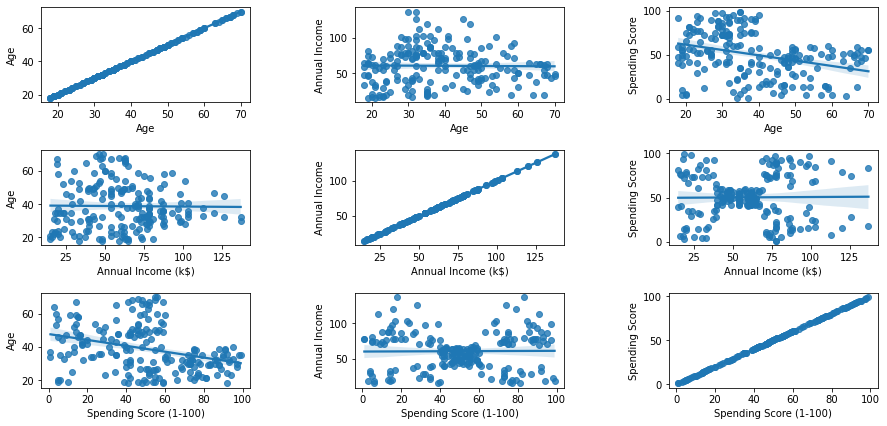

In [6]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

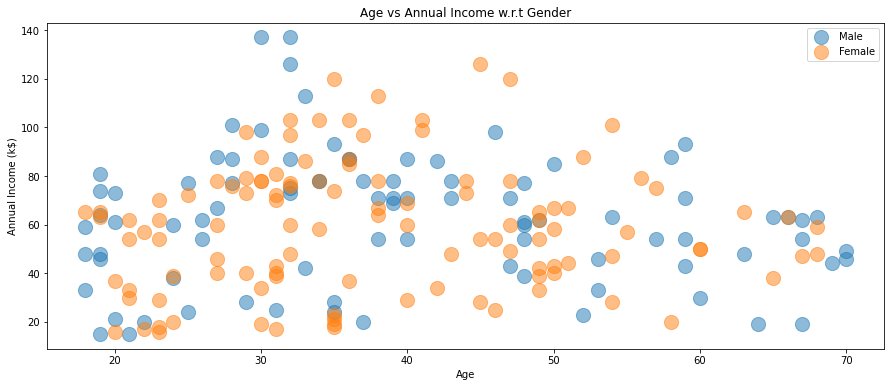

In [7]:
# Taking a look at Age and Annual income with respect to gender.
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

Now we start Clustering Data, Each cluster has datapoints which has similiar type of properties.


For sklearn.clusters.KMeans https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Here, we do first clustering on the basis of Age and Spending points

In [8]:
X1 = df[["Age", "Spending Score (1-100)"]].iloc[:,:].values
# Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point
# and its centroid, squaring this distance, and summing these squares across one cluster.
inertia = []
for i in range(1,11): # We generally take max 10 clusters
    cluster1 = KMeans(n_clusters= i,random_state=42,algorithm='elkan') #Here we are using lloyd/auto/full instead of elkan (it is efficient) because it is more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).
    cluster1.fit(X1)
    inertia.append(cluster1.inertia_)

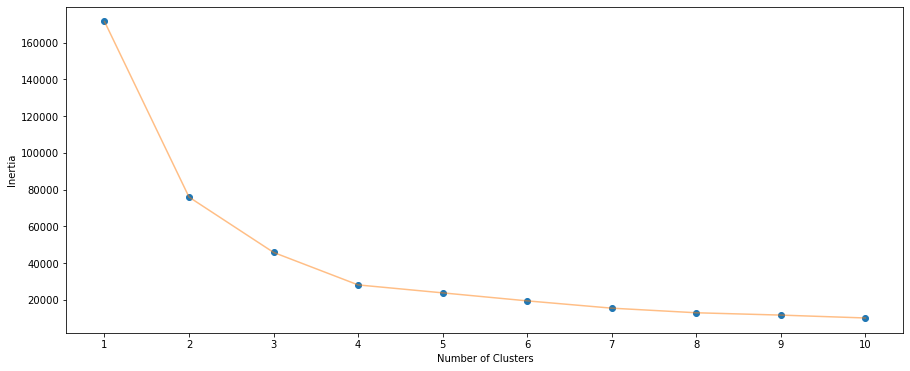

In [9]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

No. of Clusters are chosen from above graph called elbow graph, and the No. of clusters are chosen as elbow joint, which in this case is equal to 4. 

In [10]:
cluster1 = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
cluster1.fit(X1)
labels1 = cluster1.labels_
centroids1 = cluster1.cluster_centers_

In [11]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = cluster1.predict(np.c_[xx.ravel(), yy.ravel()]) 

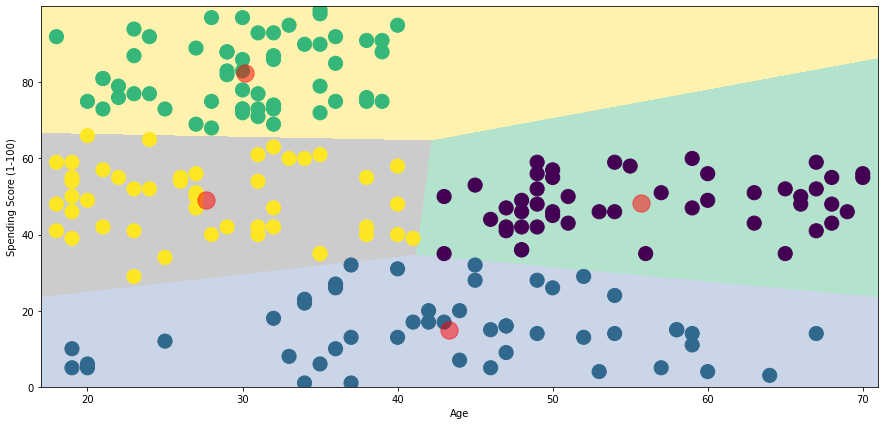

In [12]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

Clustering On the basis of Annual Income and Spending Income

In [13]:
X2 = df[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[:,:].values
inertia = []
for i in range(1,11):
    cluster2 = KMeans(n_clusters= i,random_state=42,algorithm='elkan')
    cluster2.fit(X2)
    inertia.append(cluster2.inertia_)

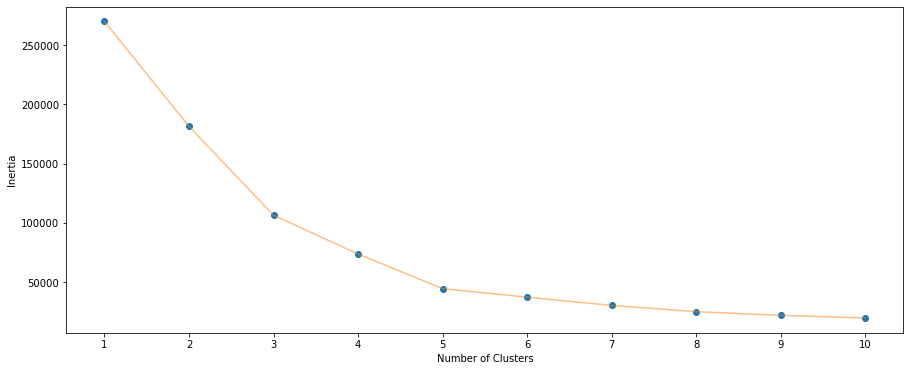

In [14]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [15]:
cluster2 = (KMeans(n_clusters = 5 ,random_state= 42  , algorithm='elkan') )
cluster2.fit(X2)
labels2 = cluster2.labels_
centroids2 = cluster2.cluster_centers_

In [16]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = cluster2.predict(np.c_[xx.ravel(), yy.ravel()]) 

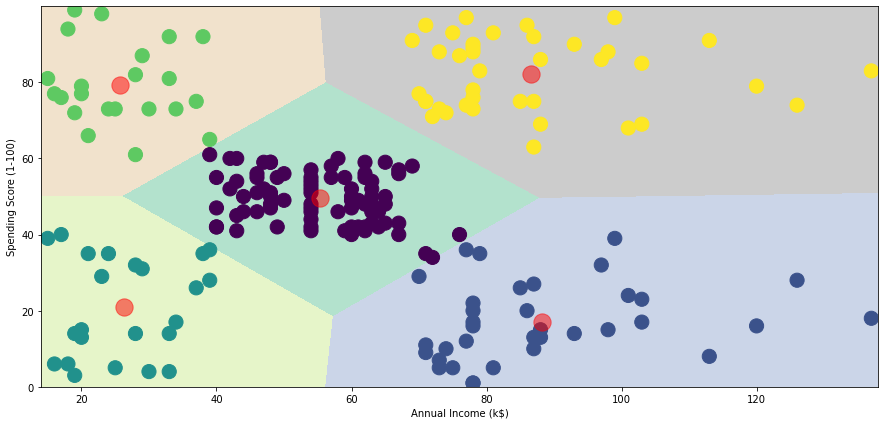

In [17]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

Clustering Using Age, Annual Income, Spending Score

In [18]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for i in range(1 , 11):
    cluster3 = (KMeans(n_clusters = i, random_state= 42  , algorithm='elkan') )
    cluster3.fit(X3)
    inertia.append(cluster3.inertia_)

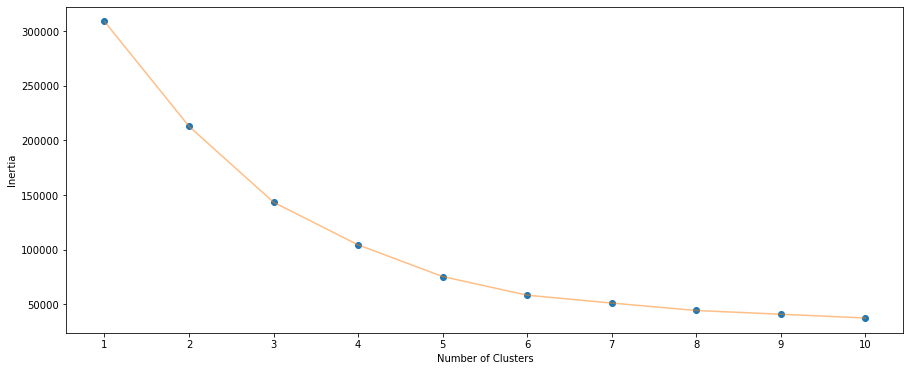

In [19]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [20]:
cluster3 = (KMeans(n_clusters = 6 ,random_state= 42  , algorithm='elkan') )
cluster3.fit(X3)
labels3 = cluster3.labels_
centroids3 = cluster3.cluster_centers_

In [21]:
display(labels3, centroids3)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1])

array([[44.31818182, 25.77272727, 20.27272727],
       [32.69230769, 86.53846154, 82.12820513],
       [56.34090909, 53.70454545, 49.38636364],
       [25.27272727, 25.72727273, 79.36363636],
       [27.        , 56.65789474, 49.13157895],
       [41.68571429, 88.22857143, 17.28571429]])

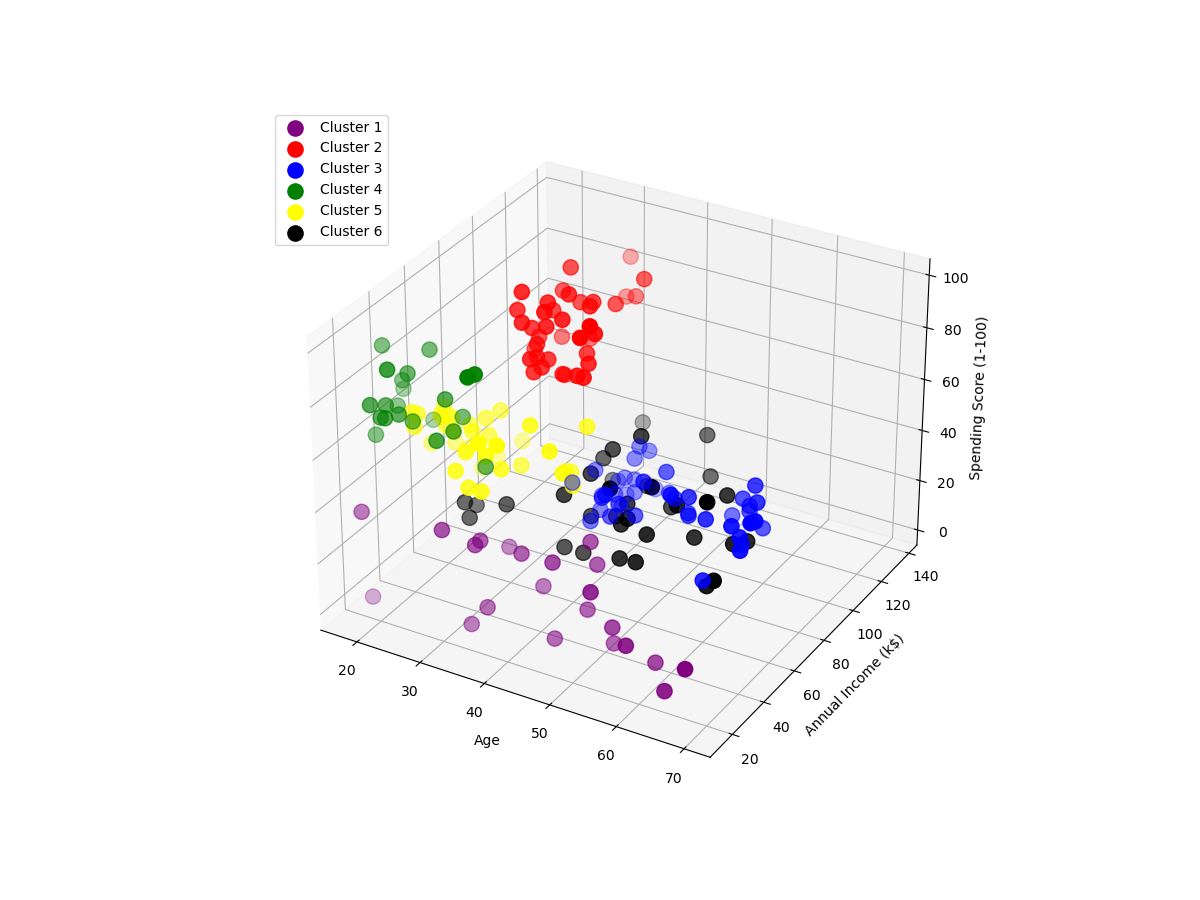

In [22]:
%matplotlib widget
df['label'] = labels3
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='purple', s=120,label="Cluster 1")
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=120,label="Cluster 2")
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='blue', s=120,label="Cluster 3")
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='green', s=120,label="Cluster 4")
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='yellow', s=120,label="Cluster 5")
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='black', s=120,label="Cluster 6")
plt.legend(loc = 'upper left')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()